In [64]:
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import parser
import numpy as np

conn = None
try:
    conn = sqlite3.connect("elpro.db")
    print(sqlite3.version)
except Error as e:
    print(e)




2.6.0


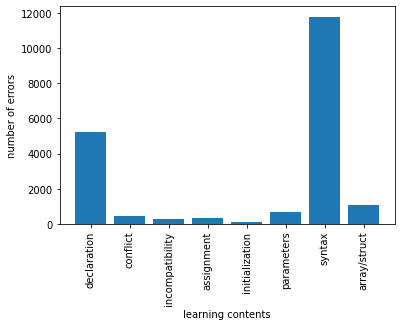

In [76]:
cur = conn.cursor()
cur.execute('select error_topics.Column2, count(*)   from errors_class_csv,  error_topics where  errors_class_csv.Column3=error_topics.Column1 group by errors_class_csv.Column3 ')
rows = cur.fetchall()

labels = []
values = []

for row in rows:
       #if row[0]!="syntax":
            labels.append(row[0])
            values.append(row[1])
# plt.pie(values, labels=labels, labeldistance=None)
plt.bar(labels,values)
plt.xticks(rotation=90)
plt.xlabel("learning contents")
plt.ylabel("number of errors")
plt.savefig("images/error_class.png",dpi=300, bbox_inches = "tight")

# plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

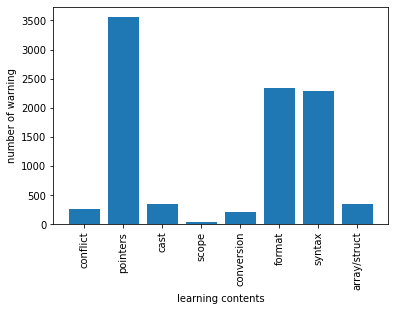

In [75]:
cur.execute('select warning_topics.Column2, count(*) from warning_class_csv,  warning_topics where  warning_class_csv.Column3=warning_topics.Column1 group by warning_class_csv.Column3 ')
rows = cur.fetchall()

labels = []
values = []

for row in rows:
       #if row[0]!="syntax":
            labels.append(row[0])
            values.append(row[1])
plt.bar(labels,values)
plt.xticks(rotation=90)
plt.xlabel("learning contents")
plt.ylabel("number of warning")
plt.savefig("images/warning_class.png",dpi=300, bbox_inches = "tight")

plt.show()

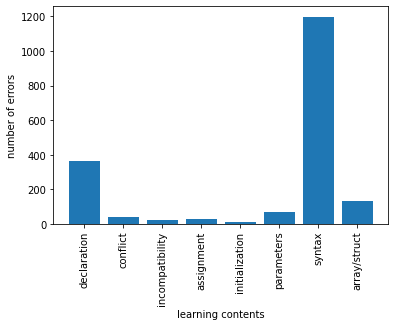

In [74]:
cur = conn.cursor()
cur.execute('select error_topics.Column2, count(*)   from last_errors_class_csv,  error_topics where  last_errors_class_csv.class=error_topics.Column1 group by last_errors_class_csv.class ')
rows = cur.fetchall()
labels = []
values = []

for row in rows:
        #if row[0]!="syntax":
            labels.append(row[0])
            values.append(row[1])
plt.bar(labels,values)
plt.xticks(rotation=90)
plt.xlabel("learning contents")
plt.ylabel("number of errors")
plt.savefig("images/last_error_class.png",dpi=300, bbox_inches = "tight")
plt.show()

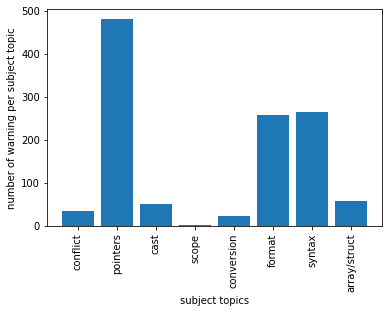

In [57]:
cur.execute('select warning_topics.Column2, count(*) from last_warning_class_csv,  warning_topics where  last_warning_class_csv.class=warning_topics.Column1 group by last_warning_class_csv.class ')
rows = cur.fetchall()

labels = []
values = []

for row in rows:
       labels.append(row[0])
       values.append(row[1])
plt.bar(labels,values)
plt.xticks(rotation=90)
plt.xlabel("subject topics")
plt.ylabel("number of warning per subject topic")
plt.savefig("images/last_warningclass.png",dpi=300, bbox_inches = "tight")

plt.show()

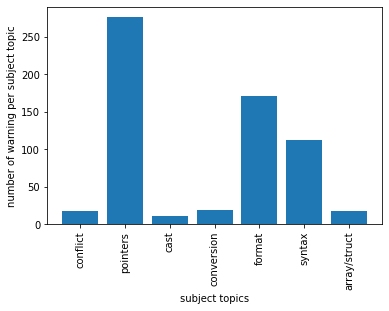

In [73]:

cur.execute('select warning_topics.Column2, count(*) from last_okwarning_class_csv,  warning_topics where  last_okwarning_class_csv.class=warning_topics.Column1 group by last_okwarning_class_csv.class ')
rows = cur.fetchall()

labels = []
values = []

for row in rows:
        labels.append(row[0])
        values.append(row[1])
plt.bar(labels,values)
plt.xticks(rotation=90)
plt.xlabel("subject topics")
plt.ylabel("number of warning per subject topic")
plt.savefig("images/last_okwarning_class.png",dpi=300, bbox_inches = "tight")

plt.show()

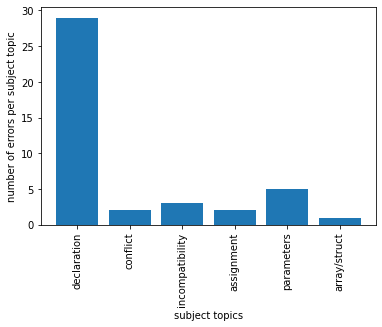

In [72]:
cur = conn.cursor()
cur.execute('select error_topics.Column2, count(*)   from last_croudy_errors_class_csv,  error_topics where last_croudy_errors_class_csv.class=error_topics.Column1 group by last_croudy_errors_class_csv.class')
rows = cur.fetchall()

labels = []
values = []

for row in rows:
       if row[0]!="syntax":
            labels.append(row[0])
            values.append(row[1])
plt.bar(labels,values)
plt.xticks(rotation=90)
plt.xlabel("subject topics")
plt.ylabel("number of errors per subject topic")
plt.savefig("images/last_croudy_class.png",dpi=300, bbox_inches = "tight")

plt.show()

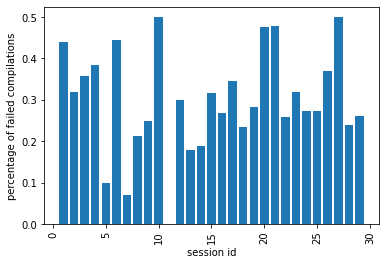

In [71]:
cur = conn.cursor()
cur.execute('select exams.session, count(*) from last_compilation,exams where last_compilation.exam=exams.id group by exams.session order by exams.session')

rows = cur.fetchall()

results = {}

for row in rows:
       results[row[0]] = row[1]

cur.execute('select exams.session, count(*) from last_compilation,exams where success=0 and last_compilation.exam=exams.id group by exams.session order by exams.session')
rows2 = cur.fetchall()


for row in rows2:
       results[row[0]] = row[1]/results[row[0]]
for key in results.keys():
    if results[key] >1:
        results[key] = 0
plt.bar(results.keys(),results.values())
plt.xticks(rotation=90)
plt.xlabel("session id")
plt.ylabel("percentage of failed compilations")
plt.savefig("images/last_failed_comp_class.png",dpi=300, bbox_inches = "tight")

plt.show()


In [70]:
cur = conn.cursor()
cur.execute('select error_topics.Column2  from error_topics')
rows = cur.fetchall()

labels = []

for row in rows:
    if row[0] is not None:
        labels.append(row[0])

cur = conn.cursor()
cur.execute('select error_topics.Column2, count(*), last_croudy_errors_class_csv.exam   from last_croudy_errors_class_csv,  error_topics where last_croudy_errors_class_csv.class=error_topics.Column1 group by last_croudy_errors_class_csv.exam,last_croudy_errors_class_csv.class')
rows = cur.fetchall()



students ={}
for row in rows:
       if row[2] in students.keys():
           students[row[2]][row[0]] = row[1]
       else:
           students[row[2]]={}
           for label in labels:
               students[row[2]][label]=0
           students[row[2]][row[0]] = row[1]
line = " & "
for label in labels:
    line += label + " & "
print(line)
for key in students.keys():
    line = str(key)
    for label in labels:
        line += " &" + str(students[key][label])
    print(line)

 & declaration & conflict & incompatibility & assignment & initialization & parameters & syntax & array/struct & 
412 &1 &0 &0 &0 &0 &0 &12 &0
417 &0 &0 &0 &0 &0 &0 &11 &0
419 &0 &0 &0 &0 &0 &0 &1 &0
421 &1 &0 &0 &0 &0 &0 &0 &0
423 &1 &0 &0 &0 &0 &1 &10 &0
425 &1 &0 &0 &0 &0 &0 &5 &0
429 &2 &0 &0 &0 &0 &0 &4 &0
431 &0 &0 &0 &0 &0 &0 &1 &0
434 &1 &0 &0 &0 &0 &0 &5 &1
435 &2 &0 &0 &0 &0 &0 &3 &0
436 &0 &0 &0 &0 &0 &0 &5 &0
439 &11 &1 &3 &0 &0 &0 &9 &0
440 &0 &0 &0 &0 &0 &0 &1 &0
441 &0 &0 &0 &1 &0 &0 &2 &0
444 &2 &1 &0 &0 &0 &2 &10 &0
445 &0 &0 &0 &0 &0 &0 &1 &0
447 &1 &0 &0 &0 &0 &0 &8 &0
450 &0 &0 &0 &0 &0 &0 &1 &0
453 &4 &0 &0 &1 &0 &1 &5 &0
454 &2 &0 &0 &0 &0 &1 &0 &0
455 &0 &0 &0 &0 &0 &0 &2 &0


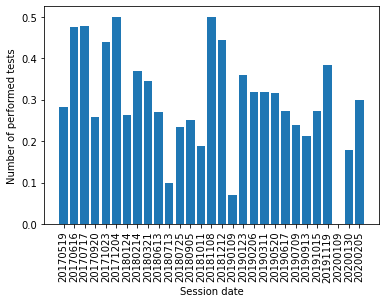

In [69]:
cur.execute('SELECT s.date, count(*) FROM last_compilation, exams, sessions s where s.id=exams.session and last_compilation.exam = exams.id  group by exams.session order by s.date')


rows = cur.fetchall()

values = {}

tot = 0
for row in rows:
      values[row[0]] = row[1]
cur.execute('SELECT s.date, count(*) FROM last_compilation , exams, sessions s where s.id = exams.session and  success= 0 and last_compilation.exam = exams.id group by session order by session')
rows = cur.fetchall()


for row in rows:
       values[row[0]] = row[1]/values[row[0]]


plt.figure()
x= []
y= []
for key in values.keys():
    if values[key] > 1:
        values[key] = 0

plt.bar(values.keys(),values.values())
#plt.legend()
plt.xticks(rotation=90)
plt.ylabel("Number of performed tests")
plt.xlabel("Session date")
plt.savefig("images/compile_err_per_session.png", dpi=300, bbox_inches = "tight")
plt.show()